In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential, save_model, model_from_json, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
import os

In [ ]:
print("Training set:")
for content in os.listdir("/content/drive/My Drive/pneumonia-detection1/train/"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia-detection1/train/"+content))),content,"images.")

print("Validation set:")
for content in os.listdir("/content/drive/My Drive/pneumonia-detection1/validation/"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia-detection1/validation/"+content))),content,"images.")

print("Test set:")
for content in os.listdir("/content/drive/My Drive/pneumonia-detection1/test/"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia-detection1/test/"+content))),content,"images.")

Training set:
1199 Normal images.
2289 Bacterial Pneumonia images.
1196 Viral Pneumonia images.
Validation set:
251 Bacterial Pneumonia images.
150 Normal images.
151 Viral Pneumonia images.
Test set:
243 Bacterial Pneumonia images.
234 Normal images.
149 Viral Pneuomina images.


In [ ]:
# data_generator = ImageDataGenerator(
#                                     rescale=1./255,
#                                     rotation_range=30,
#                                   zoom_range=0.15,
#                                   shear_range=0.15,
#                                   horizontal_flip=True,
#                                   fill_mode="nearest"
#                                     )
data_generat = ImageDataGenerator(rescale=1./255)
train_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia-detection1/train",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=16,
                                               shuffle=True)

val_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia-detection1/validation",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=16,
                                               )

Found 4682 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

Model **1**

In [ ]:
# model.summary()

In [ ]:
# r = model.fit(train_gen,epochs=25,validation_data=val_gen)

In [ ]:
# model.save('/content/drive/My Drive/pneumonia-detection/')

Model **2**

In [ ]:
from tensorflow.keras.layers import Flatten
model = Sequential(
    [
      Conv2D(64, kernel_size=(7,7), strides=(2,2), padding='same',input_shape=(256,256,3)),
      BatchNormalization(momentum=0.1, epsilon=1e-05),
      Activation('relu'),
     MaxPooling2D(pool_size=(2,2), strides=(1,1)),

      Conv2D(128, kernel_size=(5,5), strides=(2,2), padding='same'),
      BatchNormalization(momentum=0.1, epsilon=1e-05),
      Activation('relu'),
     MaxPooling2D(pool_size=(2,2), strides=(2,2)),

      Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='same'),
      BatchNormalization(momentum=0.1, epsilon=1e-05),
      Activation('relu'),
     MaxPooling2D(pool_size=(2,2), strides=(2,2)),

     Flatten(),
     Dense(1000, activation='relu'),
     Dense(300,activation='relu'),
     Dense(3,activation='softmax')
    ]
)

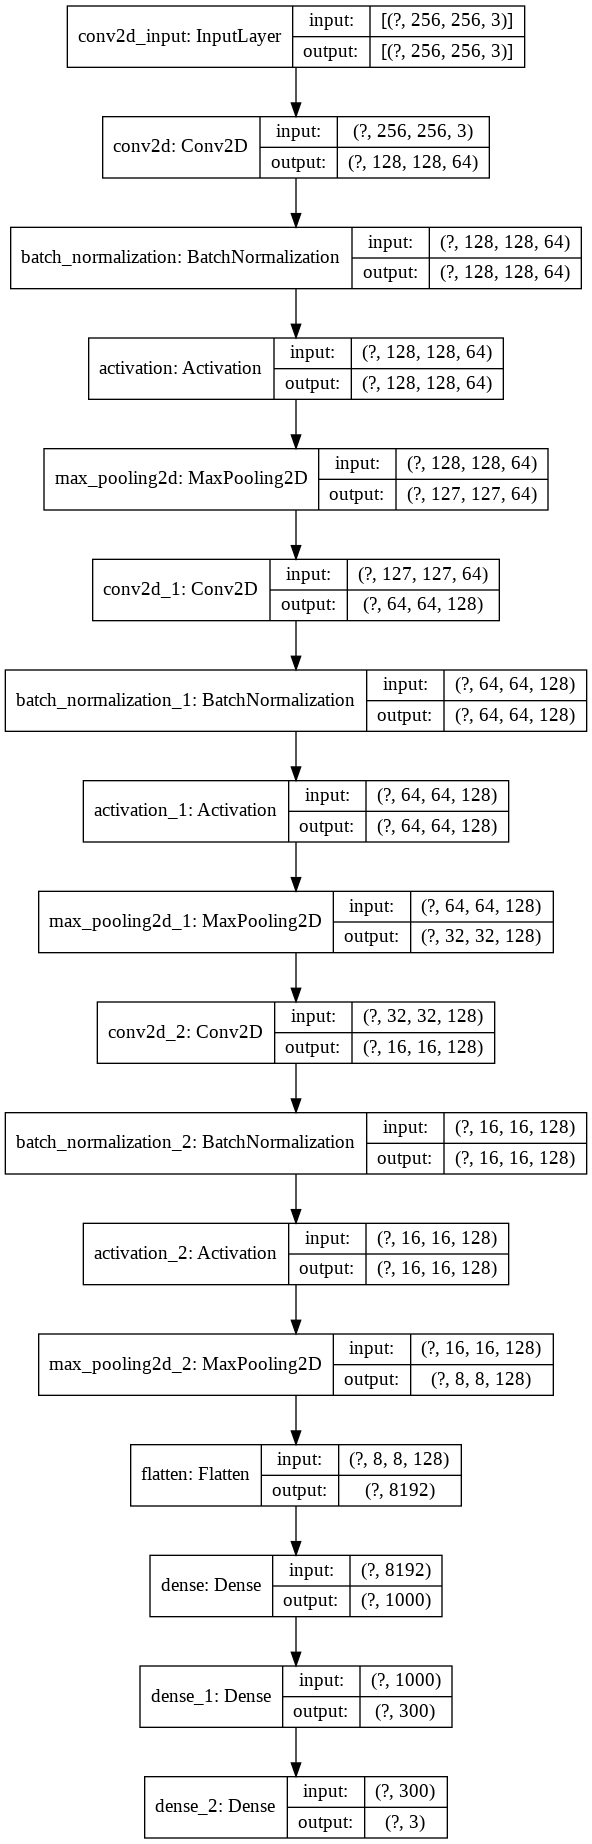

In [ ]:
tf.keras.utils.plot_model(model, to_file='/content/drive/My Drive/pneumonia-detection1/models/our_model.png', show_shapes=True, show_layer_names=True)
#Image('model.png',width=400, height=200)

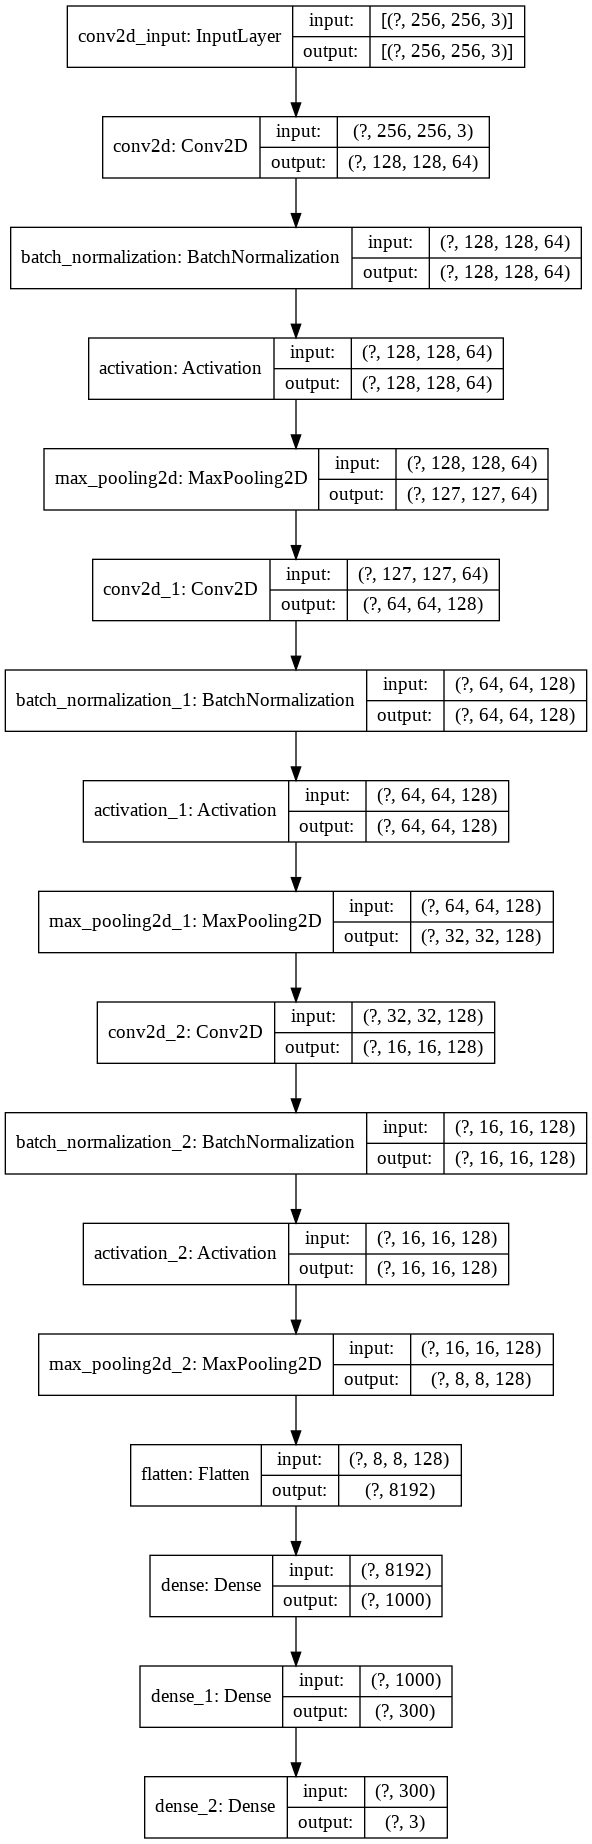

In [ ]:
tf.keras.utils.plot_model(model, to_file='/content/drive/My Drive/pneumonia-detection1/models/our_model1.png', show_shapes=True, show_layer_names=True)
#Image('model.png',width=400, height=200)

In [ ]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
# for layer in resnet.layers:
#     layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  metrics=['accuracy']
)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/pnuemonia-detection1/models/model{epoch:02d}.h5', save_weights_only=True, monitor='accuracy', verbose=1,
    save_best_only=False, mode='auto', period=5)

In [ ]:
class CustomSaver(callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if epoch==0 or epoch==19 or epoch==39 or epoch==49 or epoch==59 or epoch==69 or epoch==79 or epoch==89 or epoch==99:
      self.model.save("/content/drive/My Drive/pneumonia-detection1/our_model_without/model_epoch_{}_loss_{:7.2f}.h5".format(epoch, logs['loss']))
      print("Epoch {} over. Saving model".format(epoch))

model_saver = CustomSaver()

In [ ]:
r = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=100,
  callbacks = [model_saver]
)

Epoch 1/100
293/293 [==============================] - 2349s 8s/step - loss: 1.0286 - accuracy: 0.7021 - val_loss: 0.7341 - val_accuracy: 0.6945
Epoch 2/100
293/293 [==============================] - 62s 210ms/step - loss: 0.5206 - accuracy: 0.7689 - val_loss: 0.4877 - val_accuracy: 0.7855
Epoch 3/100
293/293 [==============================] - 61s 207ms/step - loss: 0.4903 - accuracy: 0.7858 - val_loss: 0.5148 - val_accuracy: 0.7509
Epoch 4/100
293/293 [==============================] - 61s 207ms/step - loss: 0.4657 - accuracy: 0.7915 - val_loss: 0.4698 - val_accuracy: 0.7818
Epoch 5/100
293/293 [==============================] - 61s 208ms/step - loss: 0.4455 - accuracy: 0.8059 - val_loss: 0.5221 - val_accuracy: 0.7709
Epoch 6/100
293/293 [==============================] - 61s 207ms/step - loss: 0.4338 - accuracy: 0.8082 - val_loss: 0.4469 - val_accuracy: 0.7873
Epoch 7/100
293/293 [==============================] - 61s 209ms/step - loss: 0.4173 - accuracy: 0.8133 - val_loss: 0.4462 - 

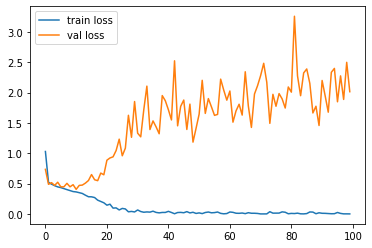

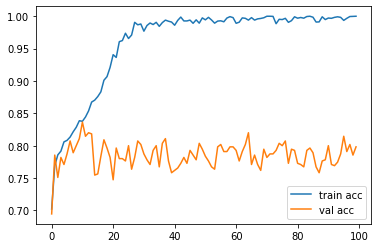

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('/content/drive/My Drive/pneumonia-detection/models/model_resnet101.h5')

In [ ]:
from tensorflow.keras.layers import Flatten
densenet = tf.keras.applications.DenseNet201(input_shape=(256,256,3), weights='imagenet', include_top=False)
x = Flatten()(resnet.output)
x = Dense(512 ,activation='relu')(x)
x = Dense(64 ,activation='relu')(x)
prediction = Dense(3 ,activation='softmax')(x),
model1 = Model(inputs=resnet.input, outputs=prediction)

ValueError: ignored

In [ ]:
for layer in densenet.layers:
    layer.trainable = False

In [ ]:
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [ ]:
r1 = model1.fit(
  train_gen,
  validation_data=val_gen,
  epochs=50,
  callbacks=checkpoint,
  steps_per_epoch=len(train_gen),
  validation_steps=len(val_gen)
)

Epoch 1/50
106/156 [===================>..........] - ETA: 49s - loss: 0.6146 - accuracy: 0.7341

KeyboardInterrupt: ignored

In [ ]:
test_gen = data_generator.flow_from_directory("/content/drive/My Drive/pneumonia-detection/test/",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=32)

Found 624 images belonging to 3 classes.


In [ ]:
model = tensorflow.keras.models.load_model('/content/drive/My Drive/pneumonia-detection/models/model_resnet101.h5')

In [ ]:
import tensorflow

In [ ]:
model.evaluate(test_gen)

20/20 [==============================] - 198s 10s/step - loss: 1.9582 - accuracy: 0.6506


[1.9581643342971802, 0.6506410241127014]

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [ ]:
plot_model(model, to_file='/content/drive/My Drive/pneumonia-detection/models/model_resnet101.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.869151 to fit

